In [1]:
from pylab import * 
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
from microbio.formats.fasta import FastaReader
aas = "ACDEFGHIKLMNPQRSTVWY"

### sequence length distribution 

In [3]:
fr_dis = FastaReader("../disprot_selected.fa")

In [4]:
fr_pdb = FastaReader("../pdb_filtered_no_disprot.fa")

In [5]:
lengths_pdb = []
seqs_pdb = []
for hdr, seq in fr_pdb.get_entries():
    lengths_pdb.append(len(seq))
    seqs_pdb.append(seq)

In [6]:
lengths_dis = []
seqs_dis = []
for hdr, seq in fr_dis.get_entries():
    lengths_dis.append(len(seq))
    seqs_dis.append(seq)

(array([ 169.,  143.,   73.,   49.,   27.,   16.,   12.,    5.,    5.,
           2.,    1.,    4.,    3.,    2.,    3.]),
 array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,
        650, 700, 750]),
 <a list of 15 Patch objects>)

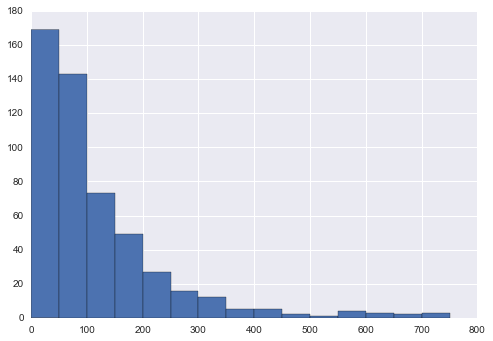

In [7]:
hist(lengths_dis, bins=range(0, 800, 50))

(array([ 11309.,   9595.,  11890.,   9846.,   7933.,   7017.,   5277.,
          3269.,   2187.,   1585.,    866.,    766.,    360.,    230.,
           267.]),
 array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,
        650, 700, 750]),
 <a list of 15 Patch objects>)

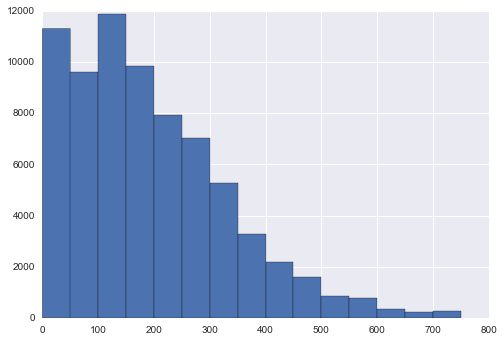

In [8]:
hist(lengths_pdb, bins=range(0, 800, 50))

In [9]:
total_counts_dis = {aa: 0 for aa in aas}
for seq in seqs_dis: 
    for aa in aas: 
        total_counts_dis[aa] += seq.count(aa)

In [10]:
total_counts_pdb = {aa: 0 for aa in aas}
for seq in seqs_pdb: 
    for aa in aas: 
        total_counts_pdb[aa] += seq.count(aa)

In [29]:
spdb = sum(list(total_counts_pdb.values()))
sdis = sum(list(total_counts_dis.values()))

In [37]:
rel_counts_dis = {k: total_counts_dis[k]/sdis for k in aas}
rel_counts_pdb = {k: total_counts_pdb[k]/spdb for k in aas}

In [38]:
x, height = zip(*rel_counts_dis.items())
xd, heightd = zip(*rel_counts_pdb.items())

In [39]:
height, heightd

((0.061734897227125204,
  0.057806183453851849,
  0.081535045265615211,
  0.018846438535557706,
  0.034319307635369813,
  0.069264931959232473,
  0.055998405739338383,
  0.079955019074190059,
  0.043358196207937141,
  0.030476000683254571,
  0.086602516654330122,
  0.016511985423902524,
  0.018917610886522804,
  0.0053236918521892612,
  0.0625320275579343,
  0.05312304276034846,
  0.10600409952741559,
  0.0067898422820702612,
  0.022163070090531232,
  0.088737687183283037),
 (0.089475786406993441,
  0.070324678136491264,
  0.081487439831919098,
  0.024087740174351033,
  0.044228558165798029,
  0.076871935303399544,
  0.056597192993395586,
  0.046803189103147014,
  0.049005630987579263,
  0.055709468061336365,
  0.058184400553572324,
  0.020908128818150799,
  0.036547898035996056,
  0.015391181294936615,
  0.058444905177356191,
  0.036992765107622706,
  0.063445901122560155,
  0.014216485577847408,
  0.040467799792496983,
  0.060808915355050133))

In [53]:
import pandas as pd

In [57]:
df = pd.DataFrame.from_dict({'pdb': height, 'dis': heightd})

In [58]:
df

,dis,pdb
0,0.089476,0.061735
1,0.070325,0.057806
2,0.081487,0.081535
3,0.024088,0.018846
4,0.044229,0.034319
5,0.076872,0.069265
6,0.056597,0.055998
7,0.046803,0.079955
8,0.049006,0.043358
9,0.055709,0.030476


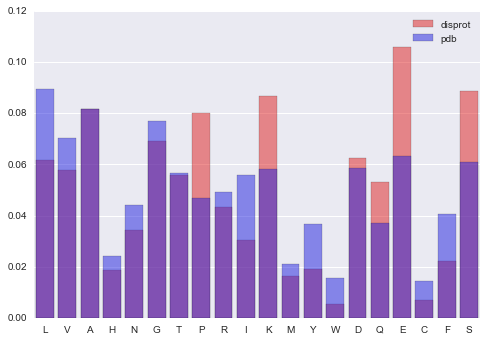

In [77]:
fig, ax = subplots()
# bar(range(20), height)
sns.barplot(x, height, ax=ax, color = "red", alpha=.5, label="disprot")
sns.barplot(x, heightd, ax=ax, color = "blue", alpha=.5, label="pdb")
legend()